/tmp/ipykernel_2286232/1498608912.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  original_cmap = mpl.cm.get_cmap('Oranges')
/home/haochiw/.local/lib/python3.10/site-packages/regionmask/core/mask.py:178: FutureWarning: Passing 'lon_name' and 'lat_name' was deprecated in v0.10.0. Please pass the coordinates directly, e.g., `mask*(ds[lon_name], ds[lat_name])`.
  warnings.warn(


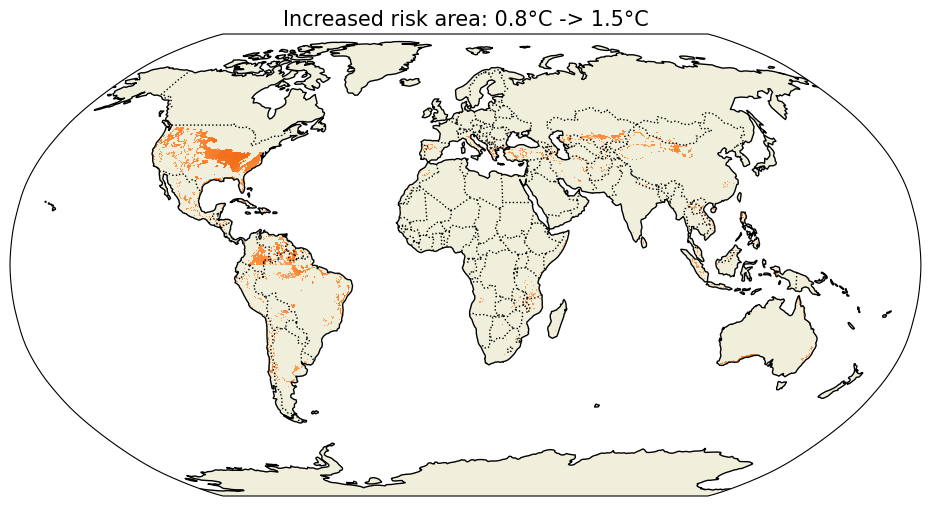

/tmp/ipykernel_2286232/1498608912.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  original_cmap = mpl.cm.get_cmap('Oranges')
/home/haochiw/.local/lib/python3.10/site-packages/regionmask/core/mask.py:178: FutureWarning: Passing 'lon_name' and 'lat_name' was deprecated in v0.10.0. Please pass the coordinates directly, e.g., `mask*(ds[lon_name], ds[lat_name])`.
  warnings.warn(


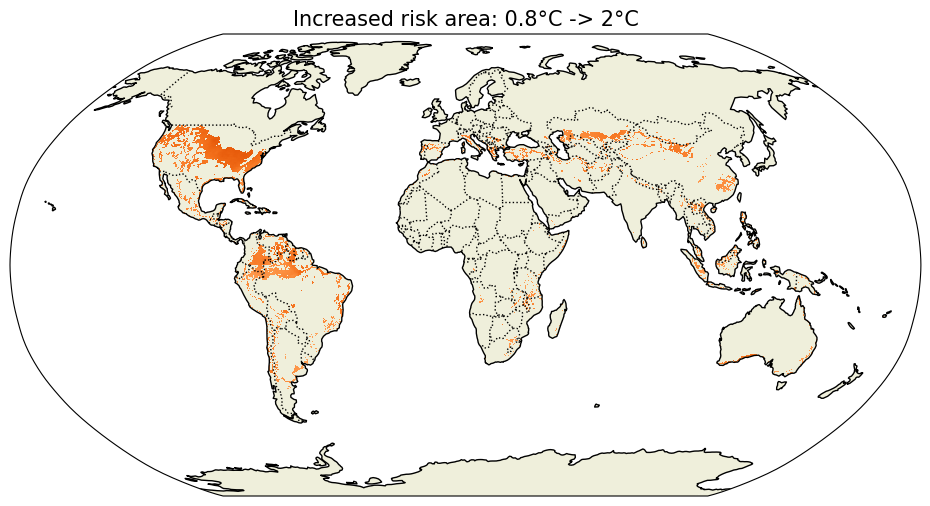

/tmp/ipykernel_2286232/1498608912.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  original_cmap = mpl.cm.get_cmap('Oranges')
/home/haochiw/.local/lib/python3.10/site-packages/regionmask/core/mask.py:178: FutureWarning: Passing 'lon_name' and 'lat_name' was deprecated in v0.10.0. Please pass the coordinates directly, e.g., `mask*(ds[lon_name], ds[lat_name])`.
  warnings.warn(


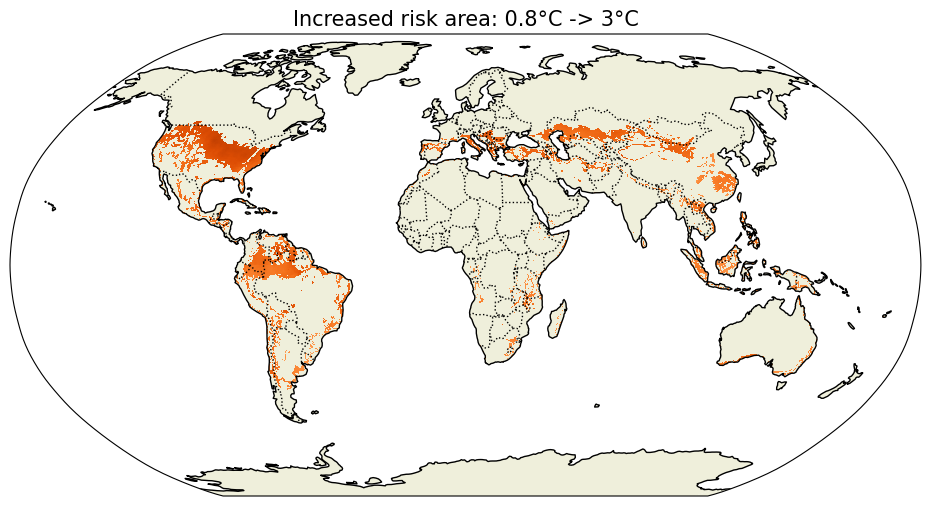

/tmp/ipykernel_2286232/1498608912.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  original_cmap = mpl.cm.get_cmap('Oranges')
/home/haochiw/.local/lib/python3.10/site-packages/regionmask/core/mask.py:178: FutureWarning: Passing 'lon_name' and 'lat_name' was deprecated in v0.10.0. Please pass the coordinates directly, e.g., `mask*(ds[lon_name], ds[lat_name])`.
  warnings.warn(


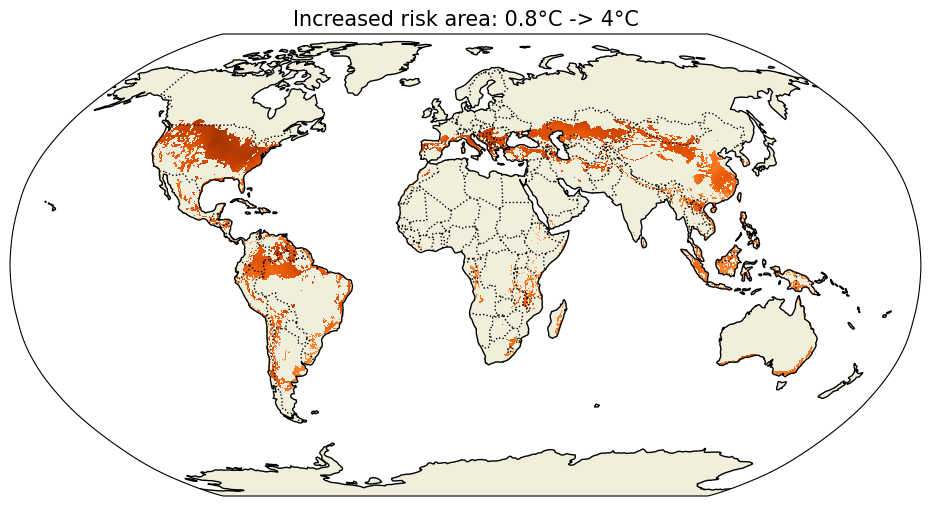

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import regionmask
import cartopy.feature as cfeature
import matplotlib as mpl

def read_temp(X):
    # read hot-hours data for +XC warming compared with preindustrial period
    mount_method='close_mount_glass_glass'
    gcm_path2 = f'/nfs/turbo/seas-mtcraig-climate/Haochi/PVTemp_Bias_Corr/0508_update_figure/13_Purdue_ERA5_temp'
    path = (gcm_path2+f'/Model_avg_PVT98_Hourly_ERA5_{mount_method}_{X}_degC.nc')
    result=xr.open_dataset(path)["pvtemp_deg°C"]
    return result

# read hot-hours data for 1.5, 2, 3, 4C degree warming compared with preindustrial period
for x in [1.5,2,3,4]:

    ds1 = read_temp(0.8)
    ds2=read_temp(x)
    original_cmap = mpl.cm.get_cmap('Oranges')    
    levels = np.arange(1, 11)  #
    norm = mpl.colors.Normalize(vmin=0, vmax=11)
    n_colors = len(levels)  
    new_colors = original_cmap(np.linspace(0.4, 1, n_colors))    
    cmap = mpl.colors.LinearSegmentedColormap.from_list("truncated_Reds", new_colors)

    specific_time_data_diff = ds2 - ds1
    
    threshold = 70
    mask_exceeds_threshold = (ds2 > threshold) & (ds1 <= threshold)

    land = regionmask.defined_regions.natural_earth.land_110
    land_mask = land.mask(specific_time_data_diff, lon_name='lon', lat_name='lat')
    
    land_solar_zenith_diff = specific_time_data_diff.where(land_mask == 0)
    
    fig = plt.figure(figsize=(12, 6))
    ax = plt.axes(projection=ccrs.Robinson(central_longitude=10))
    
    highlight = land_solar_zenith_diff.where(mask_exceeds_threshold)
    # highlight.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Oranges', add_colorbar=False)
    mask_exceeds_threshold_land = mask_exceeds_threshold.where(land_mask == 0)
    highlight.plot(ax=ax, transform=ccrs.PlateCarree(), norm=norm, cmap=cmap, add_colorbar=False)

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS,linestyle=':')
    
    ax.set_global()
    plt.title(f'Increased risk area: 0.8°C -> {x}°C', fontsize = 15)
    plt.show()
